In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

In [3]:
classifier_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
IMAGE_SHAPE = (224, 224)


In [4]:
classifier = tf.keras.Sequential([hub.KerasLayer(classifier_url, input_shape = IMAGE_SHAPE+(3,)) ])

2022-03-18 23:53:29.098488: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-18 23:53:29.098600: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [5]:
!pip install wget
import wget
image_url1 = "https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/Ch04/bulck_cart.jpg" 
image_url2 = "https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/Ch04/flower.jpg"
image_url3 = "https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/Ch04/swordweapon.jpg" 
image_url4 = "https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/Ch04/tiger.jpg"
image_url5 = "https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/Ch04/tree.jpg"

wget.download(image_url1,'image1.jpg')
wget.download(image_url2,'image2.jpg')
wget.download(image_url3,'image3.jpg')
wget.download(image_url4,'image4.jpg')
wget.download(image_url5,'image5.jpg')


'image5 (1).jpg'

In [6]:

import PIL.Image as Image
image1 = tf.keras.utils.get_file("image1.jpg",image_url1)
image1 = Image.open(image1).resize(IMAGE_SHAPE)
# scale the array
image1 = np.array(image1)/255.0
image2 = tf.keras.utils.get_file("image2.jpg",image_url2)
image2 = Image.open(image2).resize(IMAGE_SHAPE)
image2 = np.array(image2)/255.0
image3 = tf.keras.utils.get_file("image3.jpg",image_url3)
image3 = Image.open(image3).resize(IMAGE_SHAPE)
image3 = np.array(image3)/255.0
image4 = tf.keras.utils.get_file("image4.jpg",image_url4)
image4 = Image.open(image4).resize(IMAGE_SHAPE)
image4 = np.array(image4)/255.0
image5 = tf.keras.utils.get_file("image5.jpg",image_url5)
image5 = Image.open(image5).resize(IMAGE_SHAPE)
image5 = np.array(image5)/255.0

In [7]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
print (imagenet_labels)
print ("Number of labels: " , len(imagenet_labels))

['background' 'tench' 'goldfish' ... 'bolete' 'ear' 'toilet tissue']
Number of labels:  1001


In [8]:
def predict_display_image(pre_image):
    result = classifier.predict(pre_image[np.newaxis, ...])
    predicted_class = np.argmax(result[0], axis=-1)
    plt.imshow(pre_image)
    plt.axis('off')
    predicted_class_name = imagenet_labels[predicted_class]
    _ = plt.title("Prediction: " + predicted_class_name.title())
    

2022-03-18 23:53:33.810420: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-18 23:53:33.899200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


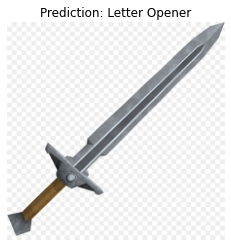

In [9]:
predict_display_image(image3)
